In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from functools import reduce

TARGET = (64,64)

def urlToFilename(url):
    return url[url.rfind('/')+1:]

separate_files = [pd.read_csv('/content/drive/My Drive/Colab Notebooks/bigCats/bigCatsCsv/training.csv',header=[0],index_col=0),
                pd.read_csv('/content/drive/My Drive/Colab Notebooks/bigCats/bigCatsCsv/validation.csv',header=[0],index_col=0),
                pd.read_csv('/content/drive/My Drive/Colab Notebooks/bigCats/bigCatsCsv/testing.csv',header=[0],index_col=0)]
files = reduce(lambda a,b : a.append(b),separate_files)
files = files.reset_index(drop=True)
f = lambda a: "/content/drive/My Drive/Colab Notebooks/bigCats/bigCatsEdited/"+str(a.name)+"_"+urlToFilename(a.OriginalURL)
g = lambda a: a.Class
training_dataframes = files.apply([f,g],axis=1)
training_dataframes.columns = ['filepath','class']
training_dataframes = training_dataframes.sample(frac=1)

idg = ImageDataGenerator(rescale=1.0/255,validation_split=0.2)
train_generator = idg.flow_from_dataframe(
    dataframe=training_dataframes,
    x_col='filepath',
    y_col='class',
    target_size=TARGET,
    subset='training'
)
val_generator = idg.flow_from_dataframe(
    dataframe=training_dataframes,
    x_col='filepath',
    y_col='class',
    target_size=TARGET,
    subset='validation'
)
#Note: Some files are missing because they are not available in the downloads
training_dataframes

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 405 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 3728 validated image filenames belonging to 4 classes.
Found 932 validated image filenames belonging to 4 classes.


,filepath,class
4001,/content/drive/My Drive/Colab Notebooks/bigCat...,Tiger
1702,/content/drive/My Drive/Colab Notebooks/bigCat...,Lion
1925,/content/drive/My Drive/Colab Notebooks/bigCat...,Lion
2112,/content/drive/My Drive/Colab Notebooks/bigCat...,Lion
394,/content/drive/My Drive/Colab Notebooks/bigCat...,Leopard
...,...,...
2624,/content/drive/My Drive/Colab Notebooks/bigCat...,Lion
715,/content/drive/My Drive/Colab Notebooks/bigCat...,Leopard
2876,/content/drive/My Drive/Colab Notebooks/bigCat...,Lion
3925,/content/drive/My Drive/Colab Notebooks/bigCat...,Tiger


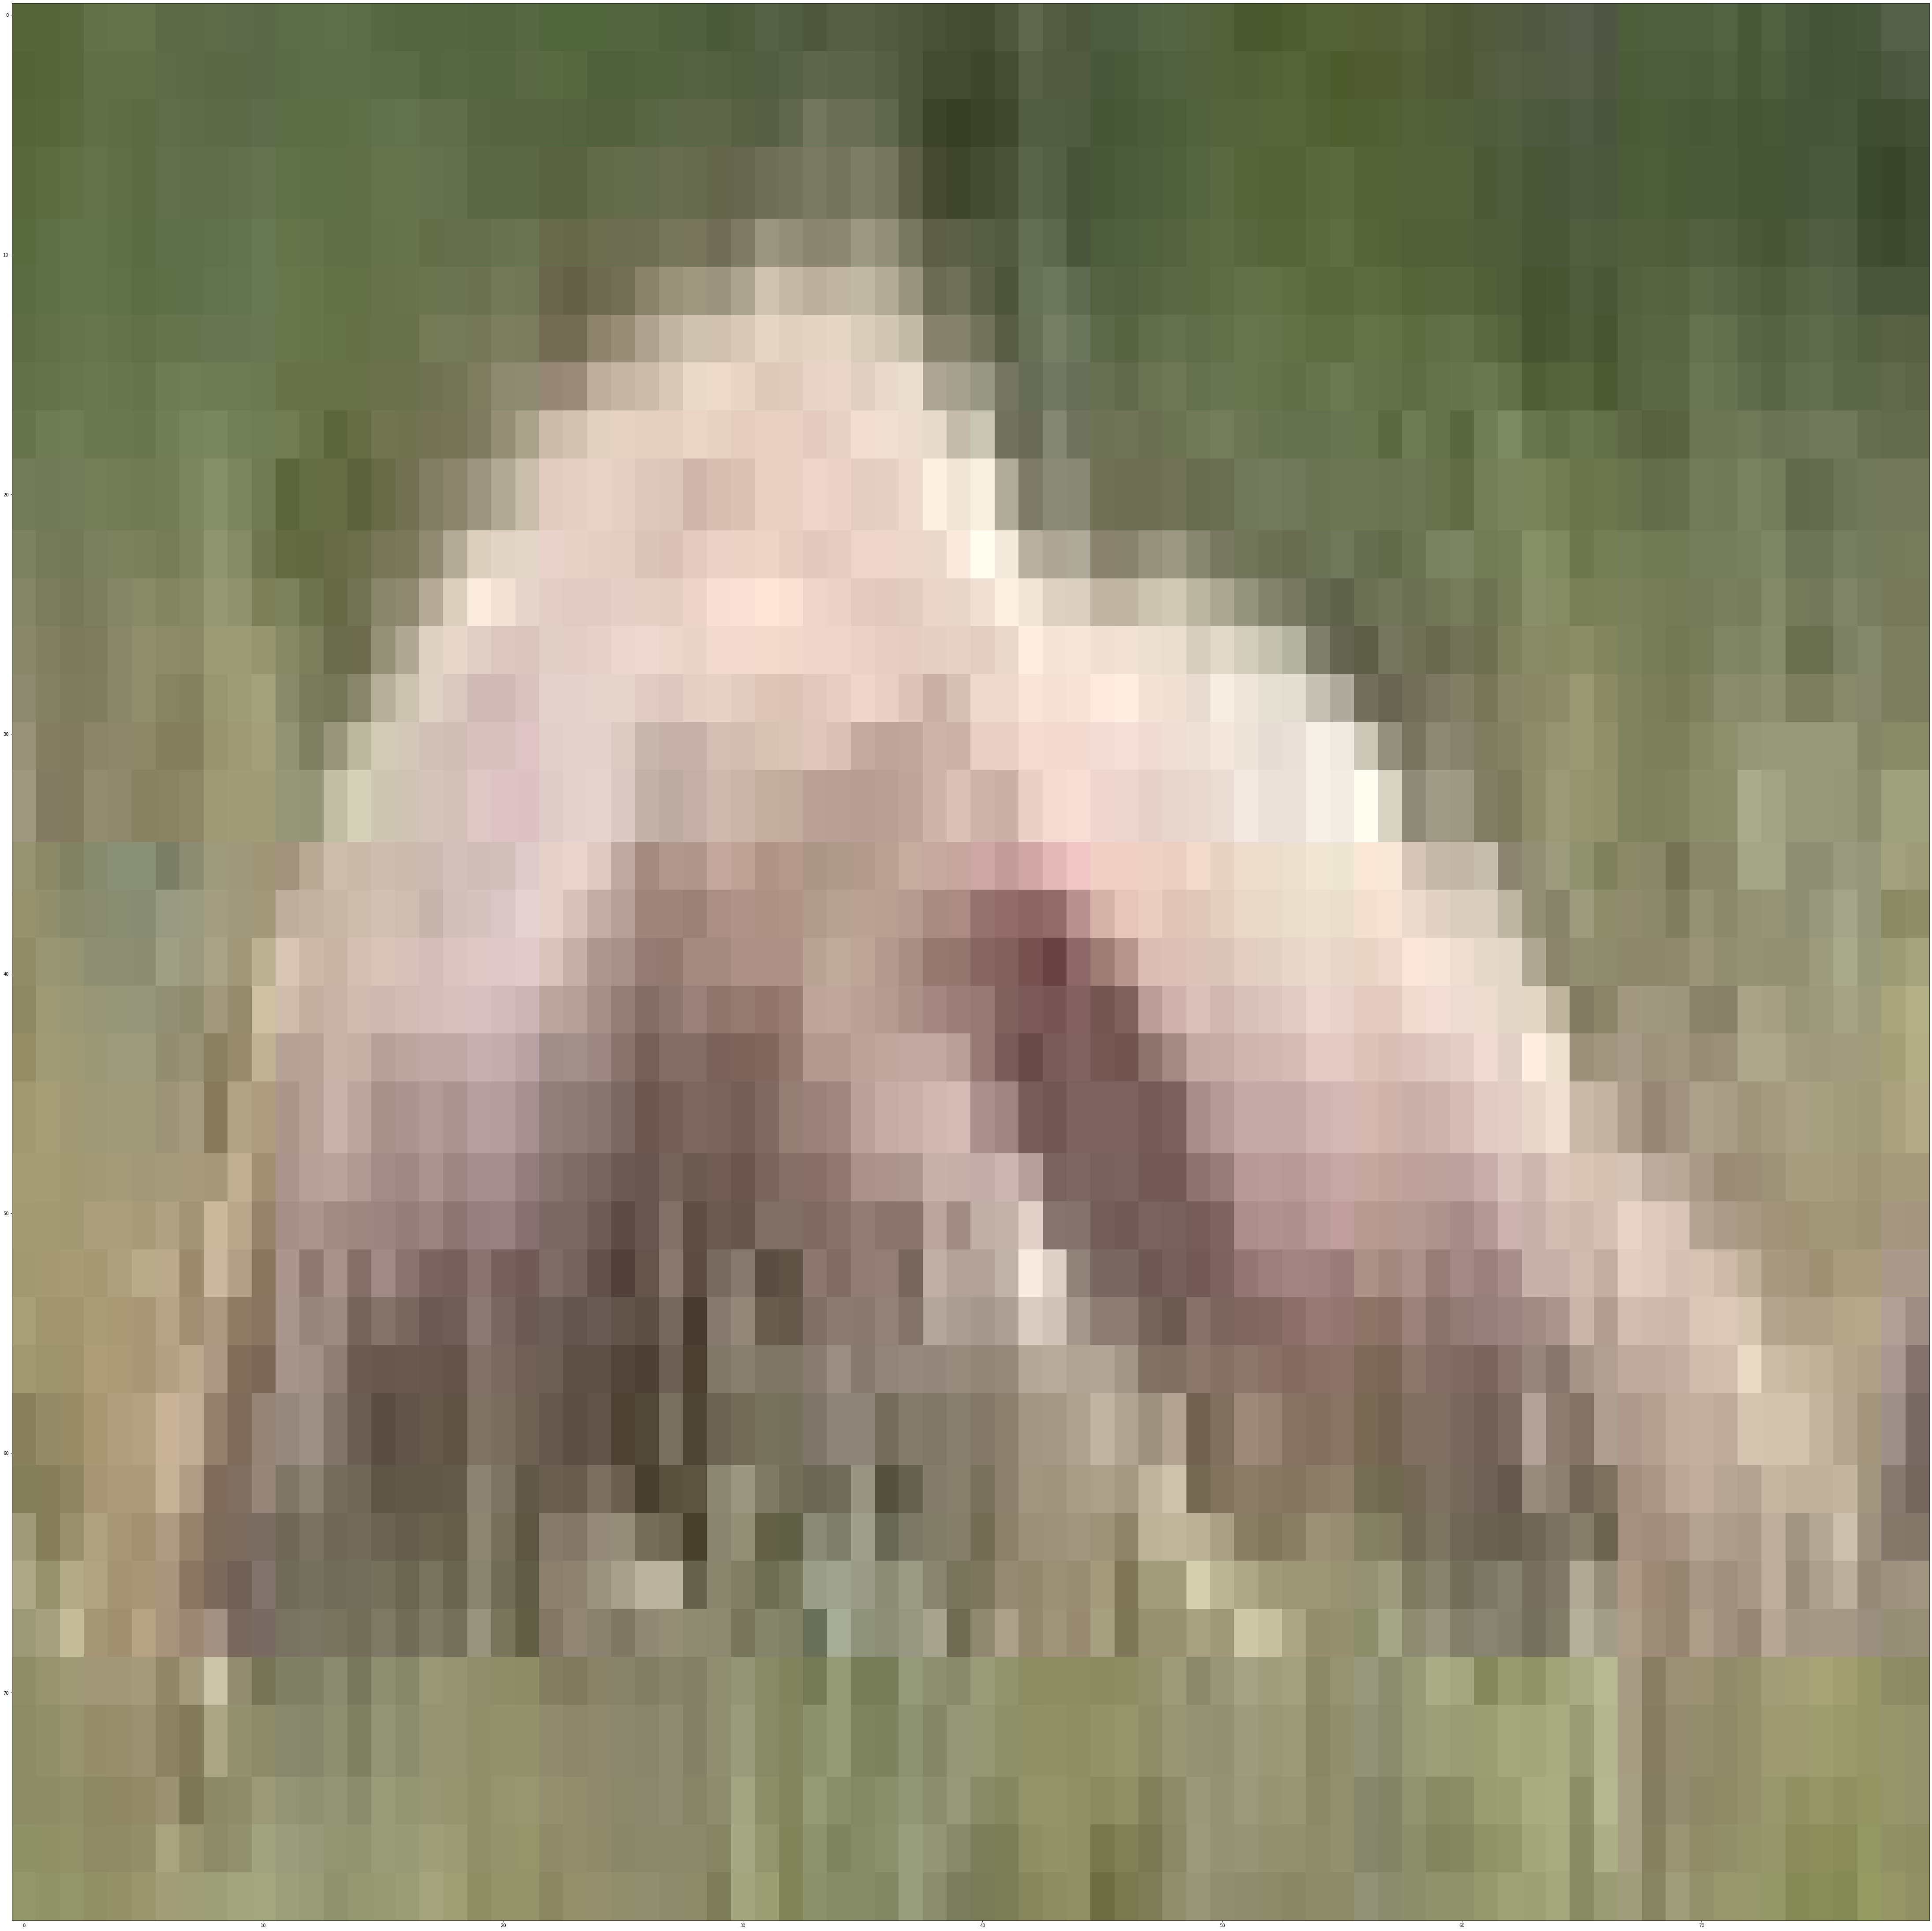

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Look at first picture of the second batch?
img = np.array(train_generator[1][0][0])
plt.figure(figsize=TARGET)
plt.imshow(img)
plt.show()

In [ ]:
#Training
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers, layers

SHAPE = np.array(train_generator[0][0][0]).shape
DROPOUT = 0.3
LAYER_SIZE = SHAPE[0]*SHAPE[1]*SHAPE[2]
L2_VAL = 0.000001

def build_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=SHAPE),
        layers.Dropout(DROPOUT),
        layers.Dense(LAYER_SIZE, activation='relu', kernel_regularizer=regularizers.l2(L2_VAL)),
        layers.Dropout(DROPOUT),
        layers.Dense(LAYER_SIZE/2, activation='relu', kernel_regularizer=regularizers.l2(L2_VAL)),
        layers.Dropout(DROPOUT),
        layers.Dense(4, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

#Trained using Google Collab
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/bigCatsCheckpoint/W{epoch:03d}.hdf5",
    save_weights_only=True
)
model = build_model()
#model.load_weights('/content/drive/My Drive/Colab Notebooks/bigCatsCheckpoint/W004.hdf5')
print(SHAPE,DROPOUT,LAYER_SIZE,L2_VAL)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    callbacks=[callback],
    epochs=100)

testing_loss, testing_accuracy = model.evaluate(testing_features,testing_labels,verbose=2)

epochStats = pd.DataFrame(history.history)
epochStats.save_as("/content/drive/My Drive/Colab Notebooks/history_csv.csv")
epochStats.plot()


(64, 64, 3) 0.3 12288 1e-06
Epoch 1/100
117/117 [==============================] - 351s 3s/step - loss: 1.8654 - accuracy: 0.3747 - val_loss: 1.8496 - val_accuracy: 0.3616
Epoch 2/100
117/117 [==============================] - 356s 3s/step - loss: 1.7495 - accuracy: 0.3758 - val_loss: 1.6883 - val_accuracy: 0.3616
Epoch 3/100
117/117 [==============================] - 352s 3s/step - loss: 1.6188 - accuracy: 0.3758 - val_loss: 1.5845 - val_accuracy: 0.3616
Epoch 4/100
117/117 [==============================] - 351s 3s/step - loss: 1.5347 - accuracy: 0.3758 - val_loss: 1.5176 - val_accuracy: 0.3616
Epoch 5/100
117/117 [==============================] - 353s 3s/step - loss: 1.4802 - accuracy: 0.3758 - val_loss: 1.4740 - val_accuracy: 0.3616
Epoch 6/100
117/117 [==============================] - 353s 3s/step - loss: 1.4447 - accuracy: 0.3758 - val_loss: 1.4454 - val_accuracy: 0.3616
Epoch 7/100
117/117 [==============================] - 358s 3s/step - loss: 1.4211 - accuracy: 0.3758 - val_